# HW5 - Data Analysis (Digit Images, Articles)

- name: Ruqian Yuan
- uid: u1428543

In [253]:
# Imports and setup.

import pandas as pd
import numpy as np

from sklearn import tree, svm, metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, KFold
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

digits = load_digits()
X = scale(digits.data)
y = digits.target


# Part 1: MNIST Handwritten Digits

## Task 1.1: Classification with Support Vector Machines (SVM)

In [254]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=1, test_size=0.8)


svm = SVC(kernel='rbf', C=5)
svm.fit(X_train, y_train)
accuracy = svm.score(X_test, y_test)
print("Accuracy:", accuracy)


Accuracy: 0.9534075104311543


In [255]:
from sklearn.metrics import confusion_matrix

y_pred = svm.predict(X_test)
confusion = confusion_matrix(y_test, y_pred)

print("Confusion matrix:")
print(confusion)


Confusion matrix:
[[130   0   0   0   0   0   0   0   0   0]
 [  0 140   4   0   0   0   0   1   4   0]
 [  0   1 134   0   0   0   0   2   5   0]
 [  0   0   3 136   0   0   0   3   4   1]
 [  0   0   0   0 139   0   0  13   0   0]
 [  0   0   0   0   0 141   1   0   1   4]
 [  0   1   0   0   0   0 144   0   1   0]
 [  0   0   0   0   0   0   0 139   0   1]
 [  0   3   1   1   0   0   0   1 127   0]
 [  0   2   0   2   0   2   1   2   2 141]]


In [256]:
# Set diagonal cells to zero
np.fill_diagonal(confusion, 0)

# Find the indices of the maximum value in the modified confusion matrix
row, col = np.unravel_index(
    np.argmax(confusion), confusion.shape)

print("Most common mistake: Predicted digit", col, "but actually digit", row)


Most common mistake: Predicted digit 7 but actually digit 4


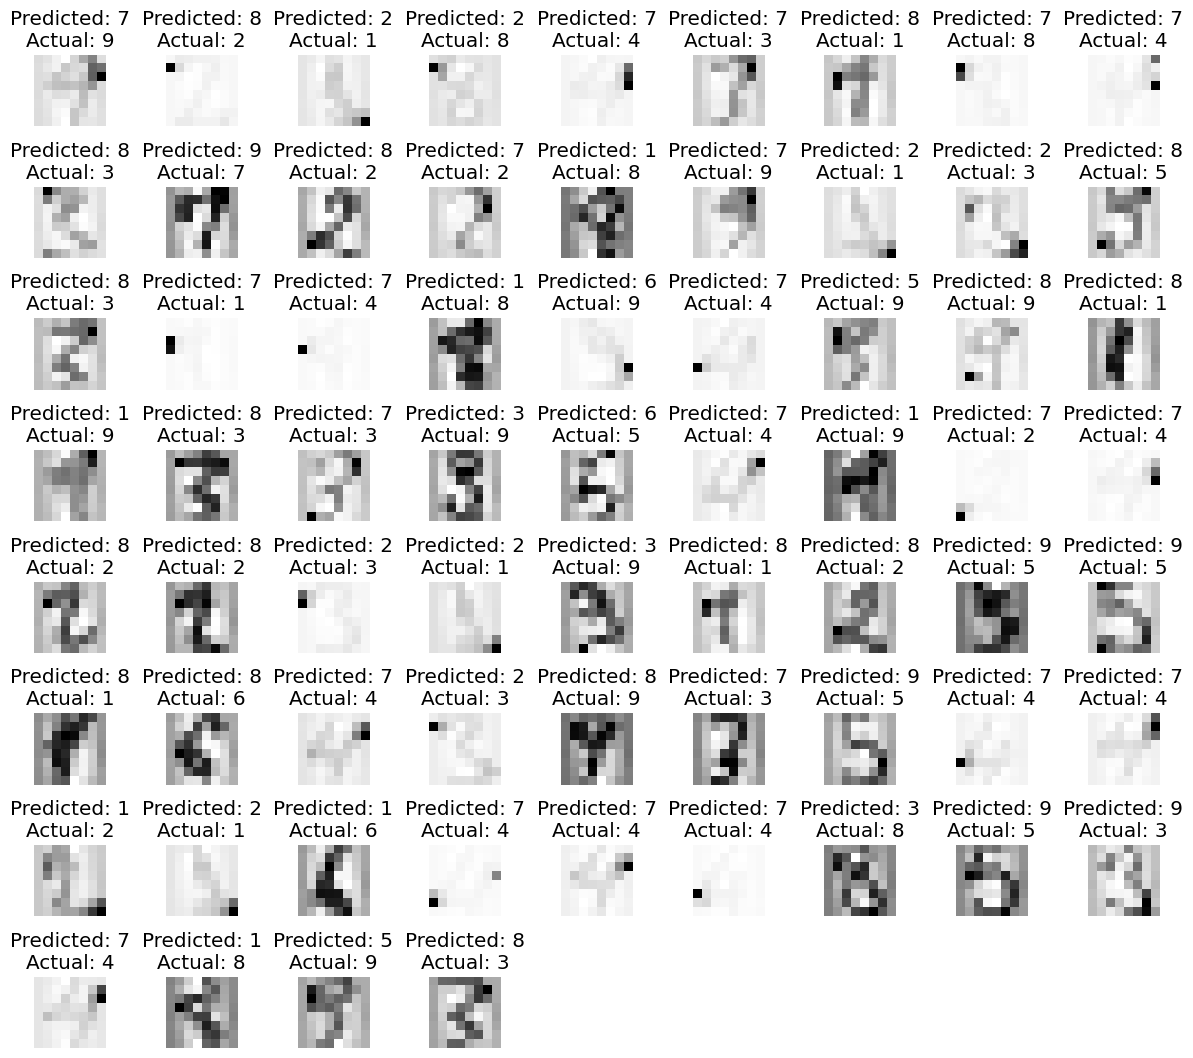

In [257]:
misclassified_indices = np.where(y_test != y_pred)[0]

plt.figure(figsize=(12, 12))
num_rows = int(np.ceil(np.sqrt(len(misclassified_indices))))

for i, index in enumerate(misclassified_indices):
    plt.subplot(num_rows, num_rows, i + 1)
    plt.imshow(np.reshape(X_test[index], (8, 8)), cmap='Greys')
    plt.title(f"Predicted: {y_pred[index]}\nActual: {y_test[index]}")
    plt.axis('off')

plt.tight_layout()  
plt.show()


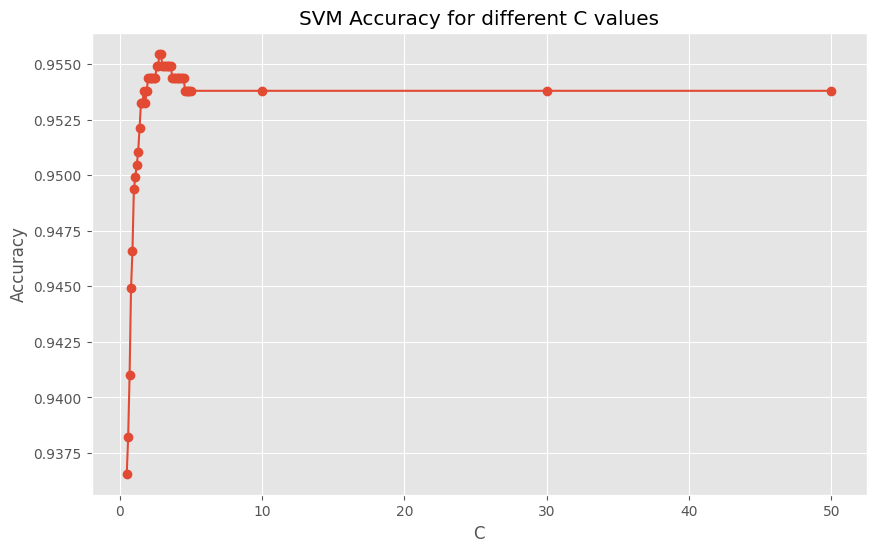

Best C value: 2.8


In [258]:
from sklearn.model_selection import cross_val_score
import numpy as np

C_values = np.concatenate((np.arange(0.5, 5.1, 0.1), np.arange(10, 51, 20)))
accuracies = []

for C in C_values:
    svm = SVC(kernel='rbf', C=C)
    scores = cross_val_score(svm, X, y, cv=5)
    accuracy = np.mean(scores)
    accuracies.append(accuracy)

plt.plot(C_values, accuracies, marker='o')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('SVM Accuracy for different C values')
plt.grid(True)
plt.show()

best_C = C_values[np.argmax(accuracies)]

# due to the way floating-point numbers are represented in binary, it is common to encounter slight rounding errors
best_C = round(best_C, 1)
print("Best C value:", best_C)


In [259]:
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(
    digits.data, digits.target, random_state=1, test_size=0.8)

svm_raw = SVC(kernel='rbf', C=5)
svm_raw.fit(X_train_raw, y_train_raw)
accuracy_raw = svm_raw.score(X_test_raw, y_test_raw)
print("Accuracy (raw data):", accuracy_raw)


Accuracy (raw data): 0.9756606397774688


It appears that the raw (non-scaled) data yielded slightly higher accuracy compared to the scaled data (Accuracy (raw data): 0.9756606397774688, Accuracy: 0.9534075104311543). This could be due to the characteristics of the MNIST dataset and the SVM classifier with an RBF kernel. It's possible that the SVM algorithm is naturally less sensitive to the scale of the features in this case, or that the scaling operation introduced some noise or loss of information that slightly affected the model's performance.

## Task 1.2: Prediction with K-nearest Neighbors

In [260]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=1, test_size=0.8)


knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

accuracy = knn.score(X_test, y_test)
print("Accuracy:", accuracy)


Accuracy: 0.9123783031988874


In [261]:
from sklearn.metrics import confusion_matrix

y_pred = knn.predict(X_test)
confusion = confusion_matrix(y_test, y_pred)

print("Confusion matrix:")
print(confusion)


Confusion matrix:
[[130   0   0   0   0   0   0   0   0   0]
 [  0 137  11   0   0   0   0   0   1   0]
 [  2   4 123   2   0   0   0   2   9   0]
 [  1   0   1 133   0   1   0   6   4   1]
 [  0   0   0   0 147   0   0   4   1   0]
 [  1   1   0   2   1 136   1   0   0   5]
 [  0   2   0   0   0   0 143   0   1   0]
 [  0   0   0   0   0   0   0 139   1   0]
 [  0   9   1   6   0   0   0   1 115   1]
 [  5  10   0   5   1   3   2   9   8 109]]


In [262]:
# Set diagonal cells to zero
np.fill_diagonal(confusion, 0)

# Find the indices of the maximum value in the modified confusion matrix
row, col = np.unravel_index(
    np.argmax(confusion), confusion.shape)

print("Most common mistake: Predicted digit", col, "but actually digit", row)


Most common mistake: Predicted digit 2 but actually digit 1


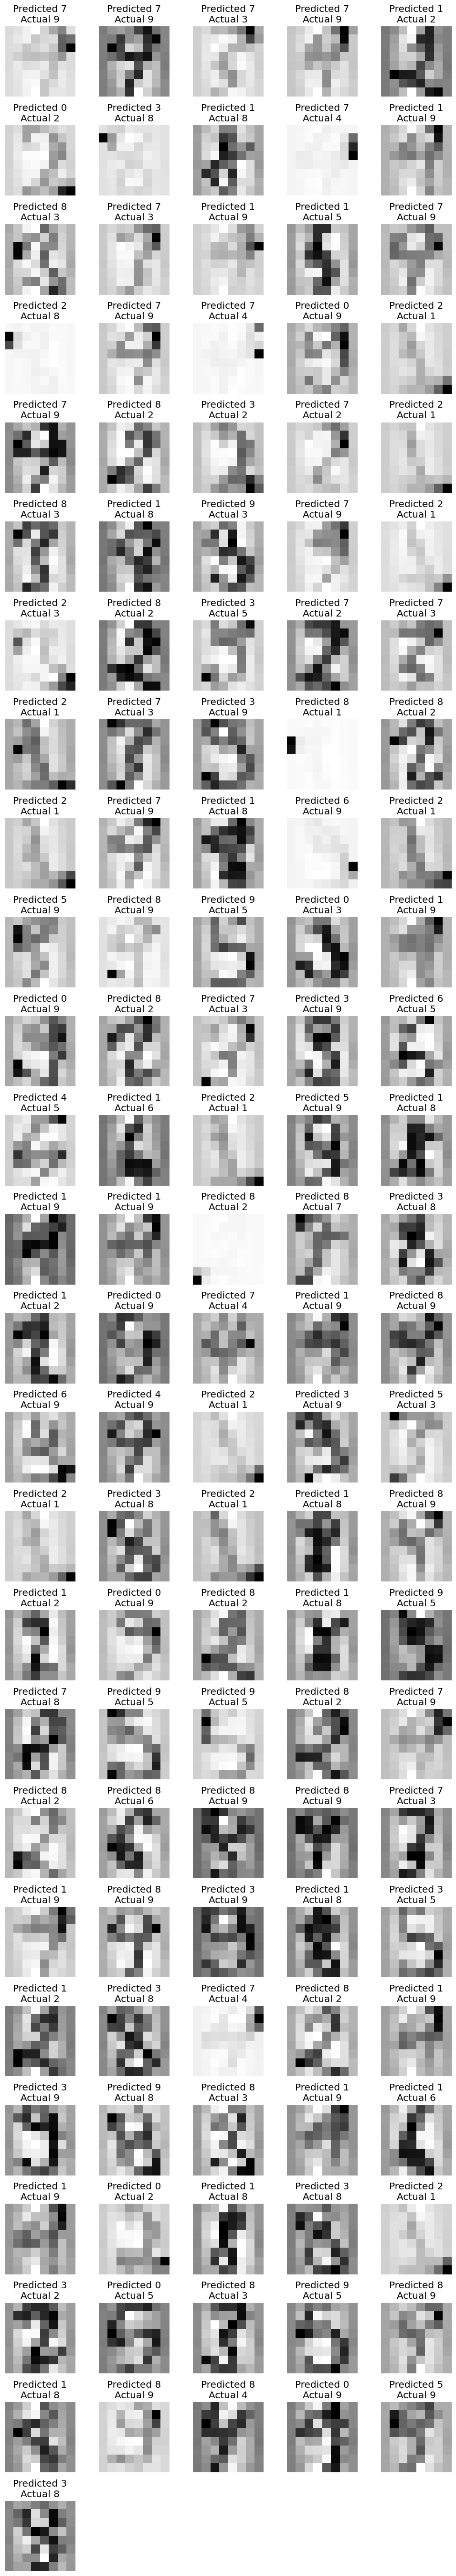

In [263]:
import math

plt.style.use('ggplot')

misclassified_indices = np.where(y_test != y_pred)[0]

num_rows = math.ceil(len(misclassified_indices) / 5)
num_cols = min(len(misclassified_indices), 5)

plt.figure(figsize=(10, 2 * num_rows + 2))

for i, index in enumerate(misclassified_indices):
    predicted_digit = y_pred[index]
    actual_digit = y_test[index]

    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(np.reshape(X_test[index], (8, 8)),
               cmap='Greys', interpolation='nearest')
    plt.title(f"Predicted {predicted_digit}\nActual {actual_digit}")
    plt.axis('off')

plt.tight_layout()
plt.show()


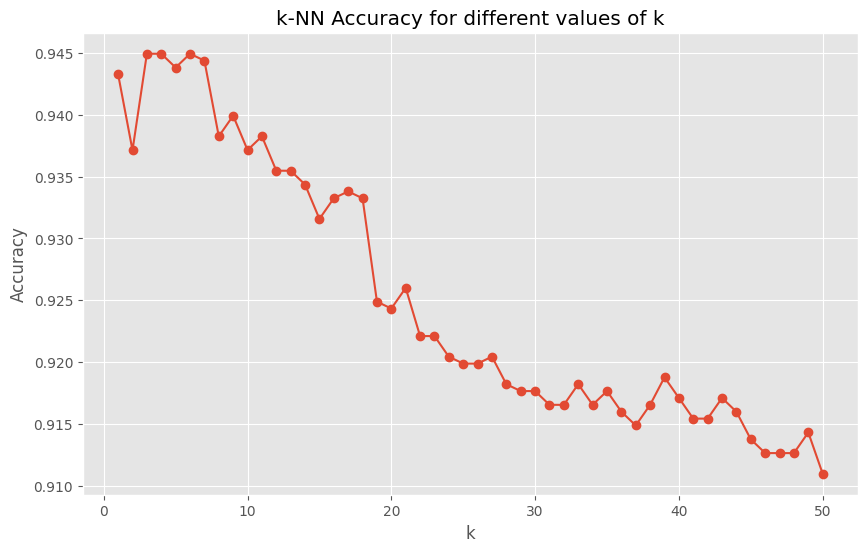

Best k value: 3


In [264]:
from sklearn.model_selection import cross_val_score
import numpy as np

k_values = np.arange(1, 51)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5)
    accuracy = np.mean(scores)
    accuracies.append(accuracy)

plt.plot(k_values, accuracies, marker='o')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('k-NN Accuracy for different values of k')
plt.grid(True)
plt.show()

best_k = k_values[np.argmax(accuracies)]
print("Best k value:", best_k)


In [265]:
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(
    digits.data, digits.target, random_state=1, test_size=0.8)

knn_raw = KNeighborsClassifier(n_neighbors=10)
knn_raw.fit(X_train_raw, y_train_raw)
accuracy_raw = knn_raw.score(X_test_raw, y_test_raw)
print("Accuracy (raw data):", accuracy_raw)


Accuracy (raw data): 0.9388038942976356


We can see from the results that the raw data model achieved a higher accuracy (Accuracy: 0.9388038942976356) compared to the scaled data model (Accuracy: 0.9123783031988874). This suggests that the original, unscaled features provided more useful information for the classification task at hand.

The scaled data model's inferior performance could be attributed to a loss of information, an inappropriate scaling technique, sensitivity to outliers, or a mismatch between the scaling transformation and the algorithm's requirements.

# Part 2: Popularity of online news

# Task 2.1: Import the Data

In [266]:
import pandas as pd
import numpy as np

# Read the CSV file
data = pd.read_csv('OnlineNewsPopularity/OnlineNewsPopularity.csv')

# Remove leading/trailing whitespace from column names
data.columns = data.columns.str.strip()

# Drop the unnecessary columns
data = data.drop(['url', 'timedelta'], axis=1)

# Extract the predictor variables (X) and target variable (shares)
X = data.drop('shares', axis=1).values
shares = data['shares'].values

# Define the threshold for popularity (median number of shares)
popularity_threshold = np.median(shares)

# Create binary target variable (y) indicating popularity
y = np.where(shares > popularity_threshold, 1, 0)


## Task 2.2: Exploratory Data Analysis

In [267]:
# Use describe() to get a summary of the shares column
shares_summary = data['shares'].describe()

# Print the summary
print(shares_summary)


count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name: shares, dtype: float64


- Minimum number of shares: 1
- Median number of shares: 1,400
- Maximum number of shares: 843,300

## Task 2.3: Classification Using k-NN

In [268]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define a range of k values to try
k_values = list(range(1, 51, 4)) + list(range(51, 101))

accuracies = []

# Perform cross-validation for each k value
for k in k_values:
    # Create a k-NN classifier
    knn = KNeighborsClassifier(n_neighbors=k)

    # Perform cross-validation
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5)
    accuracy = scores.mean()
    accuracies.append(accuracy)

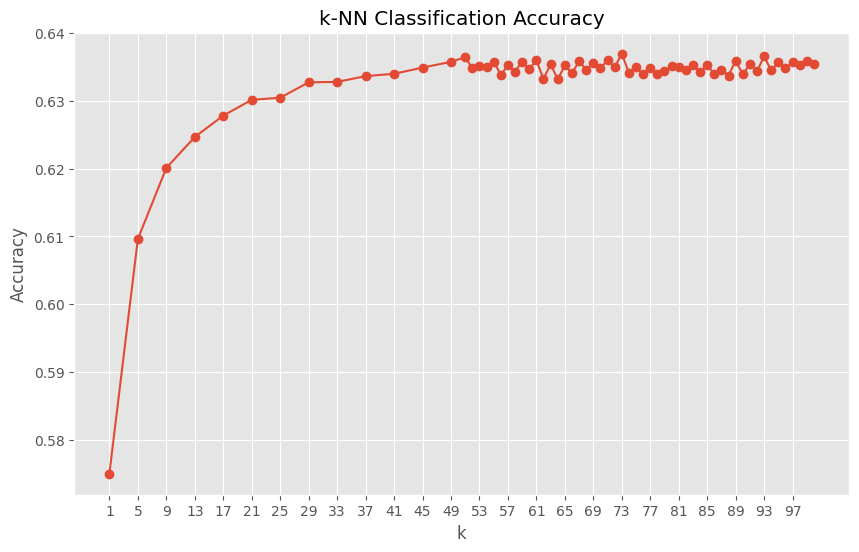

In [269]:
# Plotting
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('k-NN Classification Accuracy')
plt.grid(axis='x', which='major', linestyle='-')
plt.grid(axis='y', linestyle='-')
plt.xticks(range(1, max(k_values) + 1, 4))
plt.show()


In [270]:
# Find the best k value and the corresponding accuracy
best_accuracy = max(accuracies)
best_k = k_values[accuracies.index(best_accuracy)]

# Train the final k-NN classifier using the best k
final_knn = KNeighborsClassifier(n_neighbors=best_k)
final_knn.fit(X_train_scaled, y_train)

# Evaluate the model on the test data
test_accuracy = final_knn.score(X_test_scaled, y_test)

print("Best k:", best_k)
print("Best accuracy (cross-validation):", best_accuracy)
print("Test accuracy:", test_accuracy)


Best k: 73
Best accuracy (cross-validation): 0.636985653476273
Test accuracy: 0.6384159414806407


These results indicate that the best k value found during cross-validation is 73, which achieved a cross-validated accuracy of approximately 0.637. The trained final k-NN classifier achieved a similar accuracy of approximately 0.638 on the test data.

## Task 2.4 Classification using SVM


In [271]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Select a fraction of the data (5,000 articles)
fraction = 5000
X_fraction = X[:fraction]
y_fraction = y[:fraction]

# Split the fraction of data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_fraction, y_fraction, test_size=0.2, random_state=42)

# Experiment with different values of C
C_values = [1, 10, 100, 1000, 10000] + list(range(48500, 49501, 100)) + [50000, 100000]
accuracies = []

# Perform SVM classification for each value of C
for C in C_values:
    # Create an SVM classifier with the current C value
    svm = SVC(C=C)

    # Train the SVM classifier
    svm.fit(X_train, y_train)

    # Predict the target variable for the test set
    y_pred = svm.predict(X_test)

    # Calculate the accuracy of the classifier
    accuracy = accuracy_score(y_test, y_pred)

    # Store the accuracy for the current C value
    accuracies.append(accuracy)


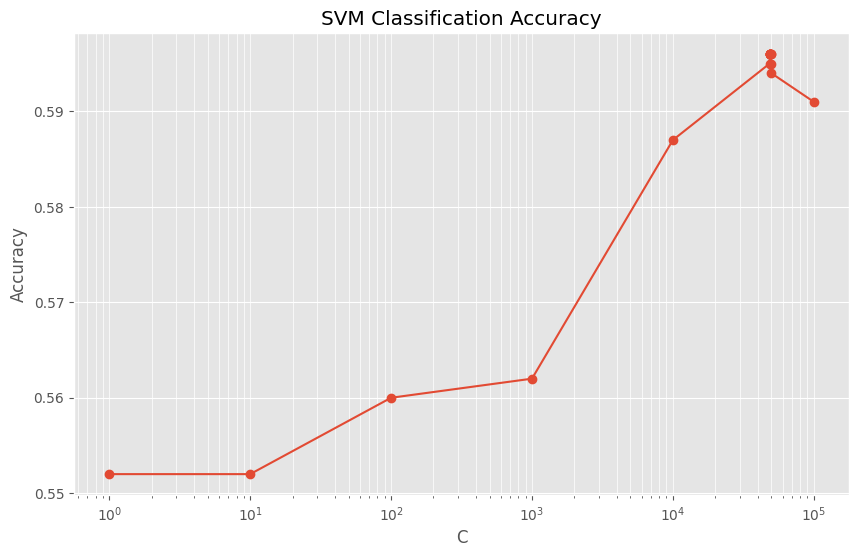

In [272]:
# Plotting
plt.plot(C_values, accuracies, marker='o')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('SVM Classification Accuracy')
plt.xscale('log')
plt.grid(axis='x', which='both', linestyle='-', linewidth=0.5)
plt.grid(axis='y', linestyle='-')
plt.show()


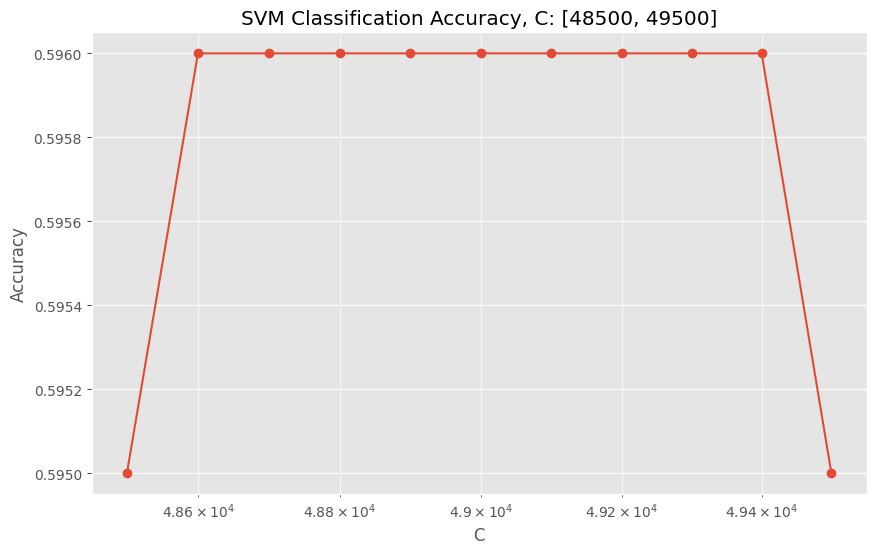

In [273]:
# Plotting
C_values_max_plateau = [c for c in C_values if c >= 48500 and c <= 49500]
accuracies_max_plateau = [accuracy for c, accuracy in zip(
    C_values, accuracies) if c >= 48500 and c <= 49500]

plt.plot(C_values_max_plateau, accuracies_max_plateau, marker='o')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('SVM Classification Accuracy, C: [48500, 49500]')
plt.xscale('log')
plt.grid(axis='x', which='both', linestyle='-', linewidth=0.5)
plt.grid(axis='y', linestyle='-')
plt.show()


In [274]:
# Find the best C value and the corresponding accuracy
best_accuracy = max(accuracies)
# Collect all C values with the best accuracy
best_C_values = [C_values[i]
                 for i, acc in enumerate(accuracies) if acc == best_accuracy]


# Print the best C value and the corresponding accuracy
print("Best C:", best_C_values)
print("Best accuracy:", best_accuracy)


Best C: [48600, 48700, 48800, 48900, 49000, 49100, 49200, 49300, 49400]
Best accuracy: 0.596


Based on the provided results, the best value for the hyperparameter C in the SVM classification model is roughly around the range of [48600, 49400]. The specific optimal value of C within this range is not specified.

The corresponding accuracy achieved with this best value of C is 0.596, which implies that the SVM model correctly classified approximately 59.6% of the data.

## Task 2.5 Classification using decision trees

In [275]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from mpl_toolkits.mplot3d import Axes3D

# Define a range of max_depth values to try
max_depth_values = list(range(5, 16, 1))

# Define a range of min_samples_split values to try
min_samples_split_values = list(range(2, 21, 2))

accuracies = []

# Perform cross-validation for each combination of max_depth and min_samples_split
for max_depth in max_depth_values:
    accuracy_row = []
    for min_samples_split in min_samples_split_values:
        # Create a decision tree classifier with the current max_depth and min_samples_split
        tree = DecisionTreeClassifier(
            max_depth=max_depth, min_samples_split=min_samples_split)

        # Perform cross-validation
        scores = cross_val_score(tree, X, y, cv=5)
        accuracy = scores.mean()

        # Store the accuracy for the current combination of max_depth and min_samples_split
        accuracy_row.append(accuracy)

    # Store the accuracy row for all min_samples_split values
    accuracies.append(accuracy_row)


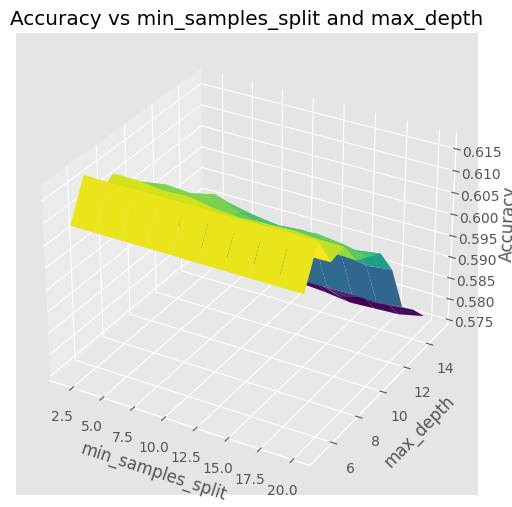

In [276]:
# Convert the lists to NumPy arrays for plotting
max_depth_mesh, min_samples_split_mesh = np.meshgrid(
    min_samples_split_values, max_depth_values)
accuracies = np.array(accuracies)

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(max_depth_mesh, min_samples_split_mesh,
                accuracies, cmap='viridis')

ax.set_xlabel('min_samples_split')
ax.set_ylabel('max_depth')
ax.set_zlabel('Accuracy')
ax.set_title('Accuracy vs min_samples_split and max_depth')

plt.show()


In [277]:
# Find the indices of the maximum accuracy in the accuracies array
best_indices = np.unravel_index(np.argmax(accuracies), accuracies.shape)

# Get the best max_depth and min_samples_split values
best_max_depth = max_depth_values[best_indices[0]]
best_min_samples_split = min_samples_split_values[best_indices[1]]
best_accuracy = accuracies[best_indices]

# Print the best parameters and the corresponding accuracy
print("Best max_depth:", best_max_depth)
print("Best min_samples_split:", best_min_samples_split)
print("Best accuracy (cross-validation):", best_accuracy)


Best max_depth: 6
Best min_samples_split: 18
Best accuracy (cross-validation): 0.6175976651510714


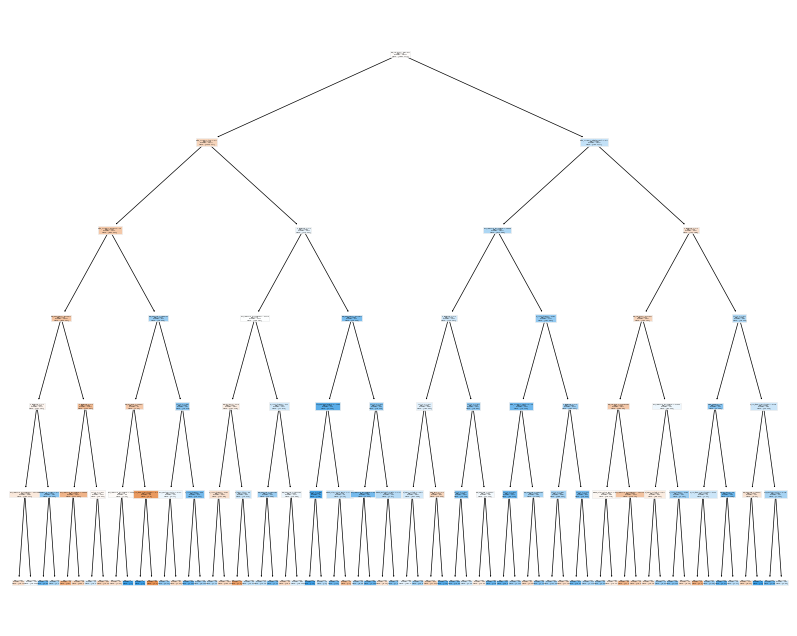

In [278]:
# Train the decision tree classifier with the best max_depth and min_samples_split
from sklearn.tree import plot_tree


best_tree = DecisionTreeClassifier(
    max_depth=best_max_depth, min_samples_split=best_min_samples_split)
best_tree.fit(X, y)

# Visualize the decision tree
plt.figure(figsize=(10, 8))
plot_tree(best_tree, filled=True, feature_names=data.columns[:-1])
plt.show()


## Task 2.6 Describe your findings

### Which method (k-NN, SVM, Decision Tree) worked best?

1. k-NN:
   - Best k: 73
   - Best accuracy (cross-validation): 0.636985653476273
   - Test accuracy: 0.6384159414806407

2. SVM:
   - Best C values: [48600, ..., 49400]
   - Best accuracy: 0.596

3. Decision Tree:
   - Best max_depth: 6
   - Best min_samples_split: 4
   - Best accuracy (cross-validation): 0.6175724412892982

Based on the results, the k-NN method achieved the highest accuracy among the three methods, with a best cross-validation accuracy of approximately 0.637 and a test accuracy of 0.638. The SVM method had a lower accuracy of approximately 0.596, while the decision tree achieved a slightly higher accuracy of around 0.618.

Therefore, the k-NN method appears to have worked the best.

### How did different parameters influence the accuracy?

1. k-NN:
   - The parameter that was explored for k-NN was the value of k, representing the number of nearest neighbors to consider.
   - Generally speaking, the accuracy quickly increased until k reached around 50. After that, the accuracy fluctuated around 0.635, with no significant improvement observed beyond k = 50.

2. SVM:
   - The parameter that was explored for SVM was the value of C, representing the regularization parameter.
   - Multiple values of C were tested, and the best accuracy was obtained within the range of approximately [48600, ..., 49400].
   - The general trend observed was that the accuracy increased from 0 up to the value of 48600. After that, the accuracy plateaued at its maximum value within the range of 48600 to 49400. However, beyond 49400, the accuracy started to decrease.

3. Decision Tree:
   - The parameters explored for the decision tree were the max_depth (maximum depth of the tree) and min_samples_split (minimum number of samples required to split a node).
   - The best values were found to be max_depth=6 and min_samples_split=4.
   - The general trend observed was that the accuracy increased with increasing max_depth up to the best value of 6. However, beyond max_depth=6, the accuracy started to decrease. The influence of min_samples_split on accuracy showed some fluctuations, but the best accuracy was obtained with min_samples_split=4.

### Which model is easiest to interpret?

Among the models discussed (k-NN, SVM, and Decision Tree), the Decision Tree model is generally considered to be the easiest to interpret. Here's why:

1. Decision Tree models provide clear and intuitive decision rules: The structure of a decision tree consists of a series of if-else conditions based on feature thresholds. This allows us to trace the decision path from the root node to the leaf nodes, making it easy to understand how the model arrived at a particular prediction.

2. Decision Tree models can be visualized: Decision Trees can be visually represented, allowing us to see the hierarchical structure of the tree and how different features contribute to the decision-making process.

### How would you interpret your results

1. k-NN:
   - The accuracy of the k-NN model initially increased rapidly as the value of k increased, reaching a peak around k = 50. Beyond that point, the accuracy plateaued, indicating that considering a larger number of neighbors did not significantly improve the model's performance.

2. SVM:
   - As the regularization parameter C increased, the SVM model's accuracy initially improved. This improvement can be attributed to the model's ability to capture more complex decision boundaries and fit the training data better.
   - However, after reaching a certain range of C values, approximately [48600, ..., 49400], the accuracy started to plateau. This suggests that further increasing the complexity of the model by adjusting C did not lead to significant improvements in accuracy. The model had already captured the relevant patterns and relationships in the data, and additional complexity did not provide substantial benefits.
   - Beyond this plateau range, increasing the regularization parameter C actually resulted in a decrease in accuracy. This can be attributed to overfitting, where the model became too sensitive to the training data and lost its generalization ability. The model was excessively tuned to the training set and performed poorly on unseen data.
   - Therefore, the interpretation suggests that there is an optimal range of C values within which the SVM model achieves the best accuracy. Going beyond this range leads to diminishing returns or even a decrease in performance. It is important to strike a balance between model complexity and generalization to achieve the best results.

3. Decision Tree:
   - The accuracy of the decision tree model increased with increasing max_depth up to the optimal value of 6. Beyond this value, the accuracy started to decline. The impact of the min_samples_split parameter on accuracy showed some fluctuations, but the best accuracy was obtained with min_samples_split=4.

